## 1. Introduction

**Bank Customer Attrition:**

Bank customer attrition, also known as ***churn***, refers to the rate at which customers stop using a bank's services or close their accounts. It essentially measures the loss of customers over a specific period. 



**The aim of this study are following**:
1. To find factors that contribute to customer churn.
2. Build a prediction model that will perform the following:
   * Classify if a customer is going to churn or not.
   * Preferably and based on model performance, choose a model that will attach a probability to the churn to make it easier for customer service to target low hanging fruits in their efforts to prevent churn.


## 2. Data set review & preparation

**In this section we will try to explore the structure of our data**:
  1. To understand the input space the data set
  2. And to prepare the sets for exploratory and prediction tasks as described in section 1


In [1]:
# Importing the function

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
from sklearn import metrics


In [2]:
# loading the dataset to panda dataframe
df=pd.read_csv("Bank Attrition dataset")

In [3]:
df.shape

(10000, 17)

The df has 10000 rows and 17 attributes.We will review this further to identify what attributes will be necessary and what data manipulation needs to be carried out before Exploratory analysis and prediction modelling

In [4]:
# checking for null values
df.isnull().sum()  # no null values

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

No null values

In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Satisfaction Score',
       'Card Type', 'Point Earned'],
      dtype='object')

In [6]:
df.nunique()

RowNumber             10000
CustomerId            10000
Surname                2932
CreditScore             460
Geography                 3
Gender                    2
Age                      70
Tenure                   11
Balance                6382
NumOfProducts             4
HasCrCard                 2
IsActiveMember            2
EstimatedSalary        9999
Exited                    2
Satisfaction Score        5
Card Type                 4
Point Earned            785
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Satisfaction Score  10000 non-null  int64  
 15  Card Type           10000 non-null  object 
 16  Point



From the above, we will not require the first 3 attributes as they are specific to a customer. It is borderline with the surname as this would result to profiling so we exclude this as well.

In [8]:
# removing the unwanted columns
df=df.drop(columns=["RowNumber","CustomerId","Surname"])

In [9]:
# printing the unique values from  columns 
vec=["Geography","Gender"]
for col in df.columns:
    if col  in vec:
      print(col,df[col].unique())
      print("*"*50)

Geography ['France' 'Spain' 'Germany']
**************************************************
Gender ['Female' 'Male']
**************************************************


The customer data is taken from European country namely France,Spain and Germany

In [10]:
df.sample(8)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Card Type,Point Earned
340,642,Germany,Female,40,6,129502.49,2,0,1,86099.23,1,4,GOLD,269
7538,601,Spain,Male,28,6,0.00,2,1,0,14665.28,0,4,PLATINUM,541
2665,612,Germany,Male,30,9,142910.15,1,1,0,105890.55,1,5,GOLD,763
8474,721,Spain,Female,33,4,72535.45,1,1,1,103931.49,0,5,GOLD,739
502,774,France,Male,60,5,85891.55,1,1,0,74135.48,1,5,GOLD,540
4192,632,France,Male,60,2,0.00,2,0,1,2085.32,0,4,SILVER,350
473,785,France,Male,28,8,0.00,2,1,0,77231.27,0,2,SILVER,937
5973,672,France,Male,37,5,153195.59,1,1,1,162763.01,0,2,PLATINUM,391


In [11]:
df.dtypes

CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

So we have 6(ActiveMember,HasCrCard ,Exited  and Card Type included) categorical variables and 9 continuous variables

In [12]:
# checking for the class imbalance
print(df["Exited"].value_counts())

Exited
0    7962
1    2038
Name: count, dtype: int64


##### **Insights**
1. RowNumber,CustomerId and Surname are removed as it is not required for modeling
2. No missing values in dataset
3. Class imbalance identified in the target(=Exited)

## 3. Exploratory Data Analysis

In this section we will try find how other attributes are related or influence the 'Exited' status .

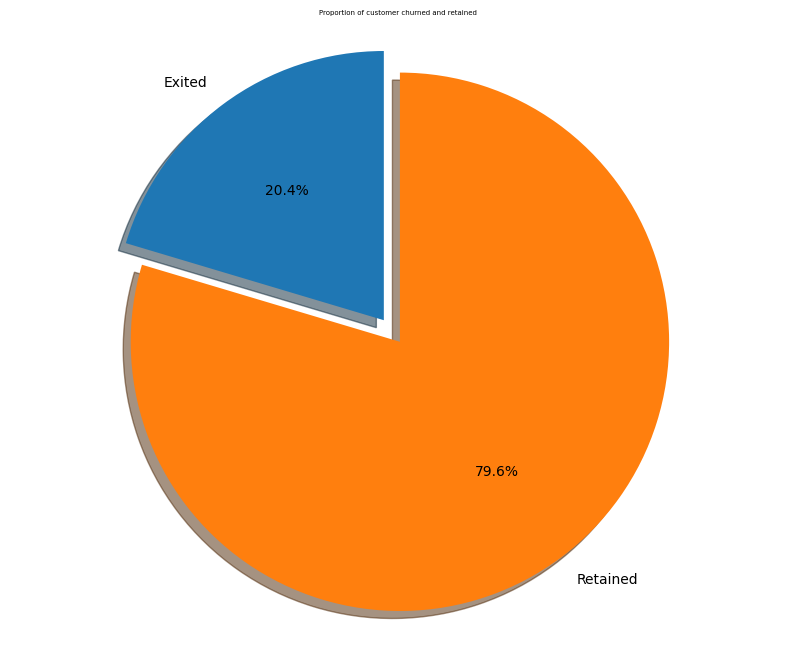

In [13]:
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 5)
plt.show()

So about 20% of the customers have churned. So the baseline model could be to predict that 20% of the customers will churn. Given 20% is a small number, we need to ensure that the chosen model does predict with great accuracy this 20% as it is of interest to the bank to identify and keep this bunch as opposed to accurately predicting the customers that are retained.

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

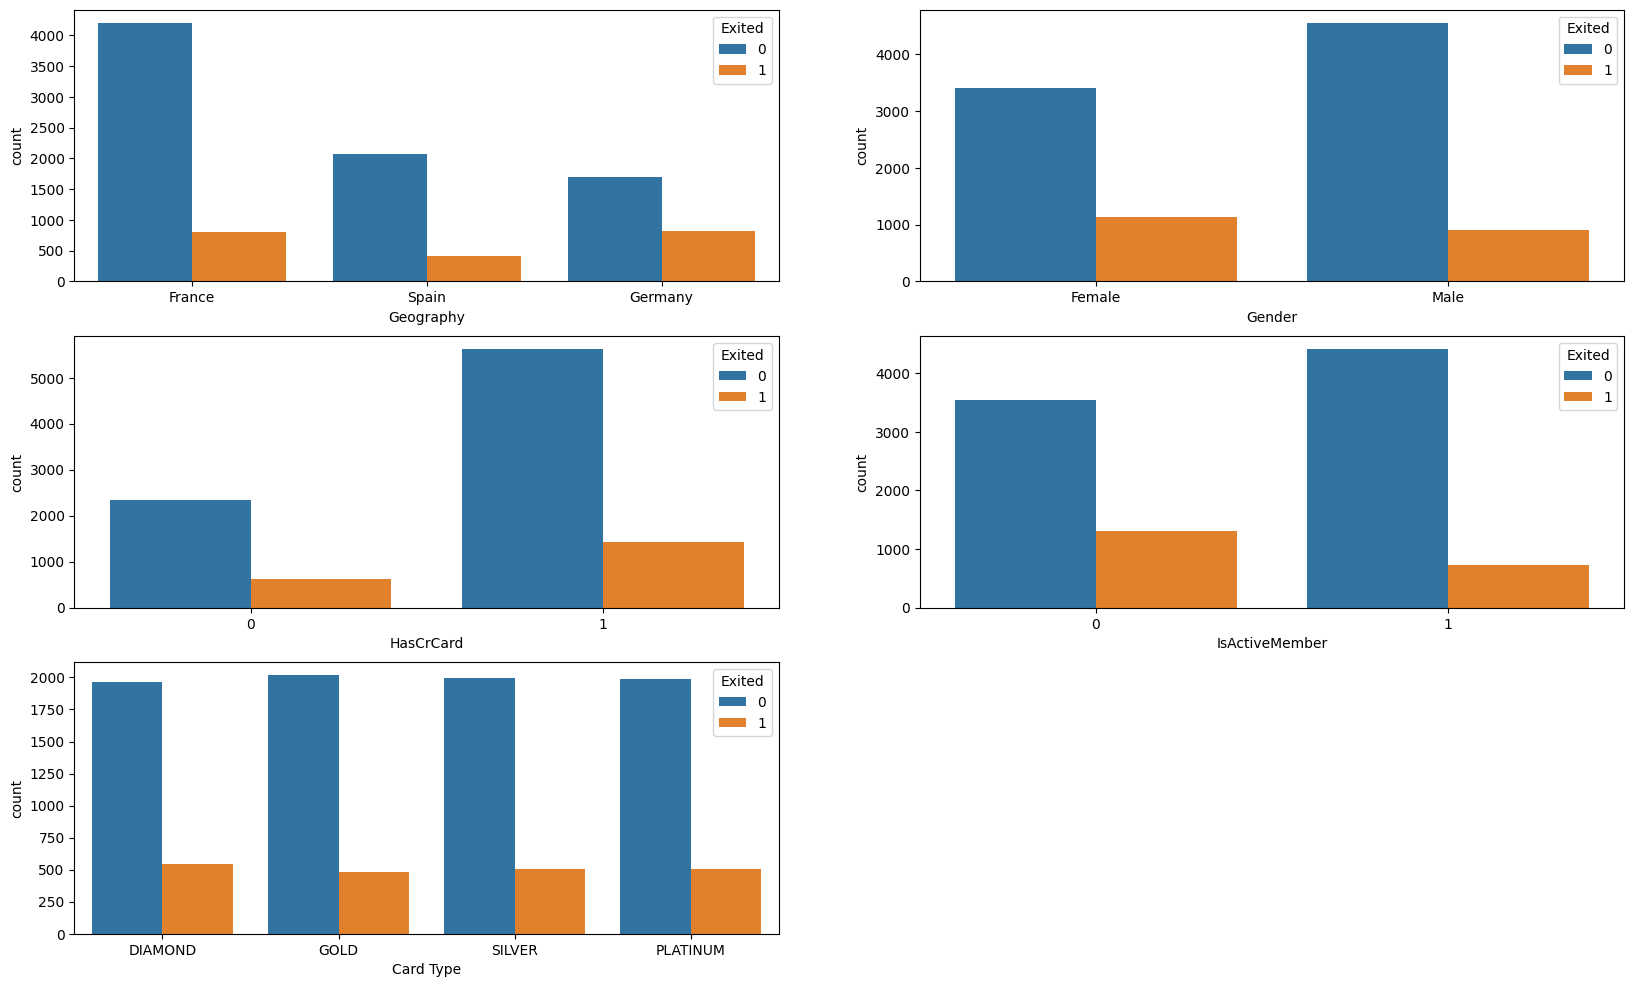

In [14]:
fig, axarr = plt.subplots(3,2 , figsize=(20, 12))

sns.countplot(x='Geography', hue='Exited', data=df, ax=axarr[0][0])
sns.countplot(x='Gender', hue='Exited', data=df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue='Exited', data=df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue='Exited', data=df, ax=axarr[1][1])
sns.countplot(x='Card Type', hue='Exited', data=df, ax=axarr[2][0])

axarr[2][1].axis('off')

We note the following:
* Majority of the data is from persons from France. However, the proportion of churned customers is with inversely related to the population of customers alluding to the bank possibly having a problem (maybe not enough customer service resources allocated) in the areas where it has fewer clients.
* The proportion of female customers churning is also greater than that of male customers
* Majority of the customers that churned are those with credit cards. Given that majority of the customers have credit cards could prove this to be just a coincidence. 
* Unsurprisingly the inactive members have a greater churn. Worryingly is that the overall proportion of inactive mebers is quite high suggesting that the bank may need a program implemented to turn this group to active customers as this will definately have a positive impact on the customer churn.


 Relations based on the continuous data attributes

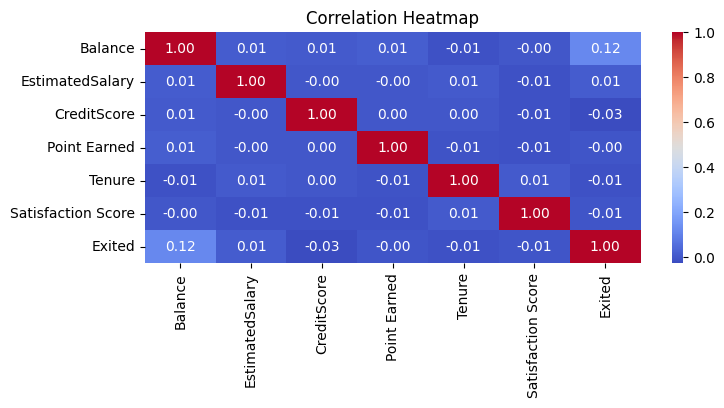

In [15]:
plt.figure(figsize=(8,3))
sns.heatmap(df[["Balance","EstimatedSalary","CreditScore","Point Earned","Tenure","Satisfaction Score","Exited"]].corr(),annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Complain and Exited attributes are highly correlated

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

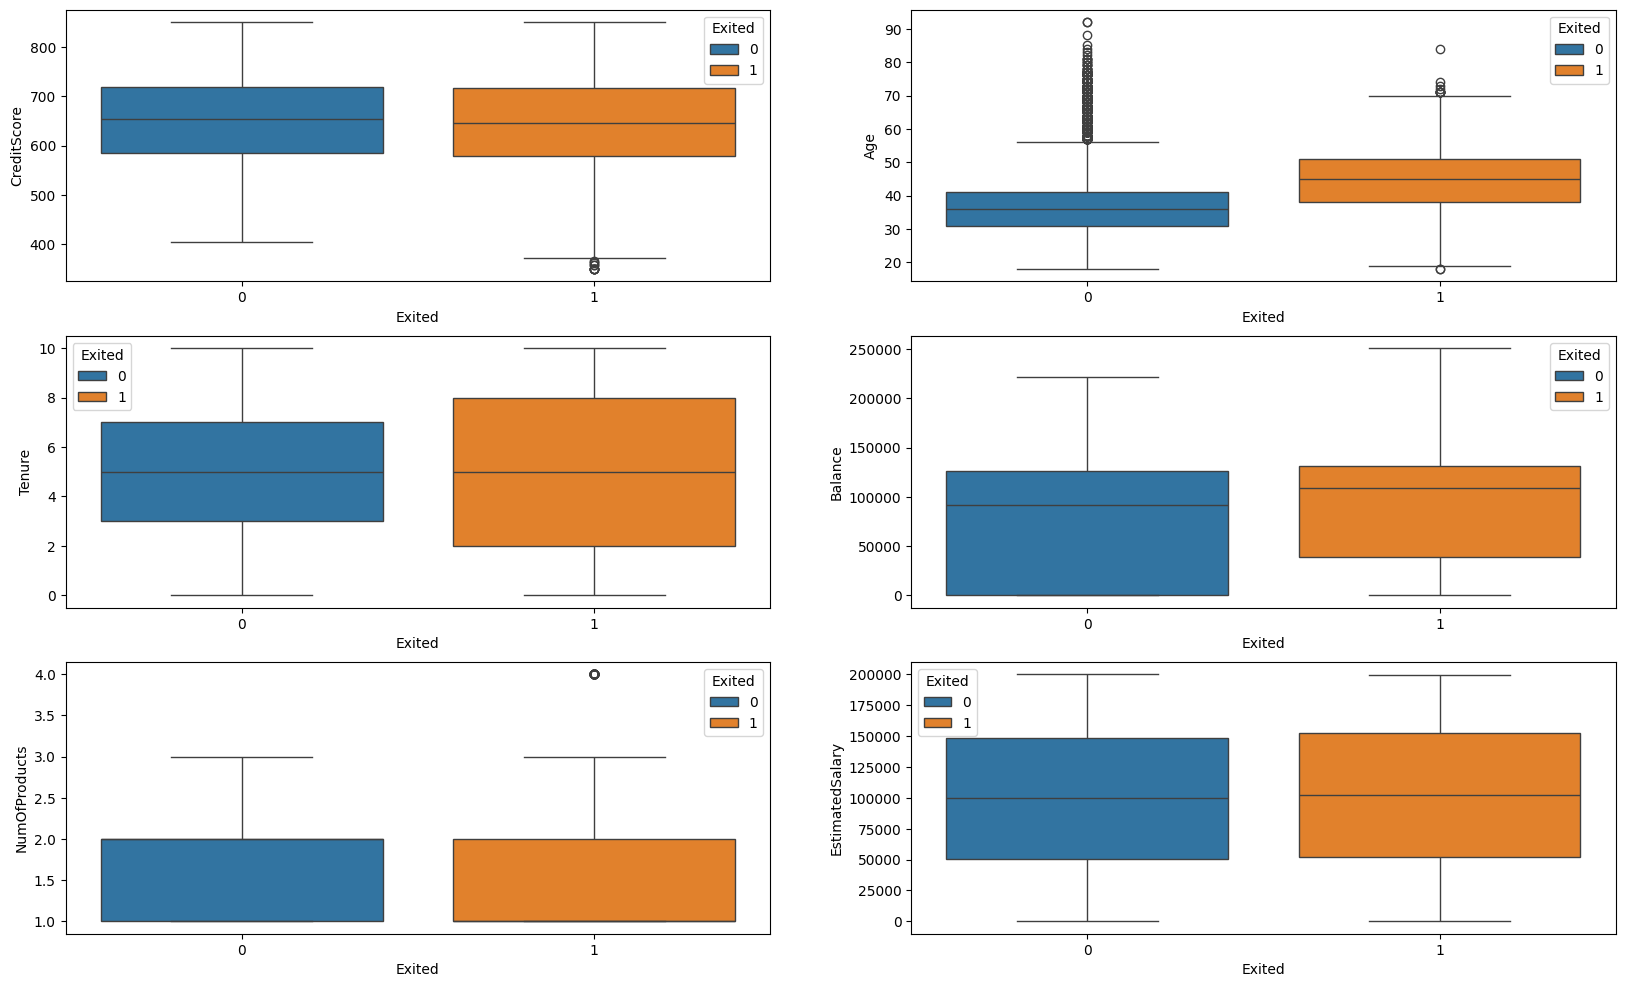

In [16]:

fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])


We note the following:
* There is no significant difference in the credit score distribution between retained and churned customers. 
* The older customers are churning at more than the younger ones alluding to a difference in service preference in the age categories. The bank may need to review their target market or review the strategy for retention between the different age groups
* With regard to the tenure, the clients on either extreme end (spent little time with the bank or a lot of time with the bank) are more likely to churn compared to those that are of average tenure.
* The bank is losing customers with significant bank balances which is likely to hit their available capital for lending.
* Neither the product nor the salary has a significant effect on the likelihood to churn.

## 4.Feature Scaling and  Encoding

We seek to add features that are likely to have an impact on the probability of churning. We first split the train and test sets

In [17]:
# Split Train, test data
df_train = df.sample(frac=0.8,random_state=200)
df_test = df.drop(df_train.index)
print(len(df_train))
print(len(df_test))

8000
2000


(-1.0, 5.0)

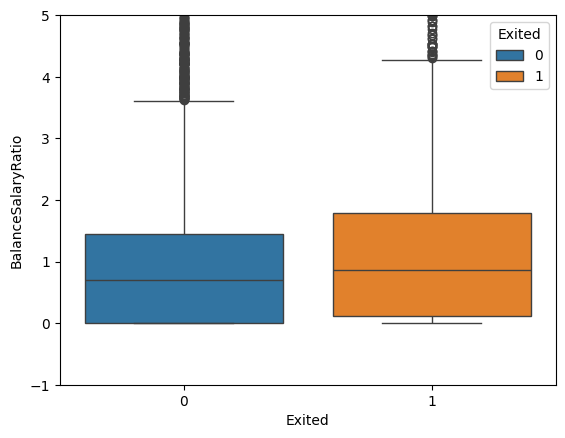

In [18]:
df_train['BalanceSalaryRatio'] = df_train.Balance/df_train.EstimatedSalary
sns.boxplot(y='BalanceSalaryRatio',x = 'Exited', hue = 'Exited',data = df_train)
plt.ylim(-1, 5)

we have seen that the salary has little effect on the chance of a customer churning. However as seen above, the ratio of the bank balance and the estimated salary indicates that customers with a higher balance salary ratio churn more which would be worrying to the bank as this impacts their source of loan capital.



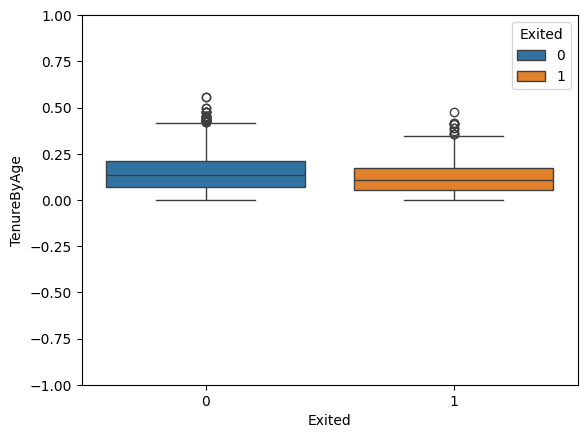

In [19]:
# Given that tenure is a 'function' of age, we introduce a variable aiming to standardize tenure over age:
df_train['TenureByAge'] = df_train.Tenure/(df_train.Age)
sns.boxplot(y='TenureByAge',x = 'Exited', hue = 'Exited',data = df_train)
plt.ylim(-1, 1)
plt.show()

In [20]:
'''Lastly we introduce a variable to capture credit score given age to take into account credit behaviour visavis adult life
:-)'''
df_train['CreditScoreGivenAge'] = df_train.CreditScore/(df_train.Age)

In [21]:
# Resulting Data Frame
df_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Card Type,Point Earned,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
8159,461,Spain,Female,25,6,0.00,2,1,1,15306.29,0,1,PLATINUM,539,0.000000,0.240000,18.440000
6332,619,France,Female,35,4,90413.12,1,1,1,20555.21,0,3,DIAMOND,389,4.398550,0.114286,17.685714
8895,699,France,Female,40,8,122038.34,1,1,0,102085.35,0,4,DIAMOND,547,1.195454,0.200000,17.475000
5351,558,Germany,Male,41,2,124227.14,1,1,1,111184.67,0,3,SILVER,476,1.117305,0.048780,13.609756
4314,638,France,Male,34,5,133501.36,1,0,1,155643.04,0,1,GOLD,355,0.857741,0.147059,18.764706


In [22]:
# Arrange columns by data type for easier manipulation
continuous_vars = ['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary', 'BalanceSalaryRatio',
                   'TenureByAge','CreditScoreGivenAge']
cat_vars = ['HasCrCard', 'IsActiveMember','Geography', 'Gender']
df_train = df_train[['Exited'] + continuous_vars + cat_vars]
df_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender
8159,0,461,25,6,0.00,2,15306.29,0.000000,0.240000,18.440000,1,1,Spain,Female
6332,0,619,35,4,90413.12,1,20555.21,4.398550,0.114286,17.685714,1,1,France,Female
8895,0,699,40,8,122038.34,1,102085.35,1.195454,0.200000,17.475000,1,0,France,Female
5351,0,558,41,2,124227.14,1,111184.67,1.117305,0.048780,13.609756,1,1,Germany,Male
4314,0,638,34,5,133501.36,1,155643.04,0.857741,0.147059,18.764706,0,1,France,Male


Encoding Nominal and ordinal attributes

In [23]:
label_cols = ['Card Type']
onehot_cols = ['Geography', 'Gender']

In [24]:
le = LabelEncoder()
for col in label_cols:
  df[col] = le.fit_transform(df[col] )

In [25]:
df.head(6)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2,0,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,3,0,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,3,0,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,5,1,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,5,1,425
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,5,0,484


In [26]:
# OneHot encoding geography and gender
df = pd.get_dummies(df, columns=onehot_cols , dtype=int)

In [27]:
X= df.drop("Exited", axis=1)
y= df["Exited"]

## 5. Handling class embalance ,Scalling and Model training

In [28]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 1. Random Forest

In [29]:
smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)
model_Rand = RandomForestClassifier()
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
model_Rand.fit(x_train, y_train)

RandomForestClassifier()

In [30]:
y_pred_Rand = model_Rand.predict(x_test)

In [31]:
print(f"Model: {model_Rand.__class__.__name__}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_Rand)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_Rand)}")


Model: RandomForestClassifier
Accuracy: 0.8595
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      1607
           1       0.66      0.58      0.62       393

    accuracy                           0.86      2000
   macro avg       0.78      0.75      0.77      2000
weighted avg       0.85      0.86      0.86      2000



Random Forest exhibit excellent performance, with accuracy precision, and recall values ,so we will try Logistic Regression model and see its performance.

#### 2.  Fit Logistic Regression

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
from sklearn.preprocessing import StandardScaler
smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [33]:
model_log = LogisticRegression()
model_log.fit(x_train, y_train)

LogisticRegression()

In [34]:
y_pred_log = model_log.predict(x_test)


In [35]:
#scores = cross_val_score(model_log, X_scaled,y, cv=5)
#print(scores.mean())

In [36]:
print(f"Model: {model_log.__class__.__name__}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_log)}")


Model: LogisticRegression
Accuracy: 0.8025
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1607
           1       0.50      0.39      0.44       393

    accuracy                           0.80      2000
   macro avg       0.68      0.65      0.66      2000
weighted avg       0.79      0.80      0.79      2000



Random Forest can be considered as suitable model for this dataset and Logistic Regression can be strong alternative.

### From the above results, my main aim is to predict the customers that will possibly churn so they can be put in some sort of scheme to prevent churn hence the recall measures on the 1's is of more importance to me than the overall accuracy score of the model.

### Given that in the data we only had 20% of churn, a recall greater than this baseline will already be an improvement but we want to get as high as possible while trying to maintain a high precision so that the bank can train its resources effectively towards clients highlighted by the model without wasting too much resources on the false positives.

### From the review of the fitted models above, the best model that gives a decent balance of the recall and precision is the random forest where according to the fit on the training set, with a precision score on 1's of 0.859, out of all customers that the model thinks will churn, 85.9% do actually churn and with the recall score of 0.58 on the 1's, the model is able to highlight 58% of all those who churned.

### 3. Fitting other classification model along with logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [38]:
lr=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
knn=KNeighborsClassifier()

In [39]:
est=[('lr',lr),('dt',dt),('rf',rf),('knn',knn)]

In [40]:
X_tr=sc.fit_transform(X)

**Individual Performance**

In [41]:
for et in est:
  scores=cross_val_score(et[1],X_tr,y,cv=15,scoring='accuracy')
  print(et[0],"has accuracy score of",np.round(np.mean(scores),2)*100,'%')

lr has accuracy score of 81.0 %
dt has accuracy score of 79.0 %
rf has accuracy score of 86.0 %
knn has accuracy score of 82.0 %


Hyperparameter Tunning for each model

For logistic Regression

In [47]:
param_grid_lr={
    'penalty':['l1','l2','elasticnet','none'],
    'C':[0.001,0.01,0.1,1,5,10],
    'max_iter':[100,200]

}

rd_lr=GridSearchCV(LogisticRegression(),param_grid_lr,cv=7,scoring='accuracy')
rd_lr.fit(X_tr,y)
print("Best choice of parameters can be:",rd_lr.best_params_)
print("With maximum score using LogisticRegression :",rd_lr.best_score_)

Best choice of parameters can be: {'C': 0.01, 'max_iter': 100, 'penalty': 'l2'}
With maximum score using LogisticRegression : 0.8110003273527744


Decision Tree

In [48]:
param_grid_dt={
    'criterion':['gini','entropy'],
    'max_depth':[5,10,20,None],
    'splitter':['best','random'],
    'max_features':['auto','sqrt','log2',None],
    'min_samples_split':[2,5,10]

}

rd_dt=GridSearchCV(DecisionTreeClassifier(),param_grid_dt,cv=7,scoring='accuracy')
rd_dt.fit(X_tr,y)
print("Best choice of parameters can be:",rd_dt.best_params_)
print("With maximum score using Decision Tree :",rd_dt.best_score_)

Best choice of parameters can be: {'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_split': 2, 'splitter': 'best'}
With maximum score using Decision Tree : 0.8529996323231881


For KNN

In [ ]:
param_grid_knn={
    'n_neighbors':[4,5,10,12,15,20],
    'weights':['uniform','distance']

}

rd_knn=GridSearchCV(KNeighborsClassifier(),param_grid_knn,cv=7,scoring='accuracy')
rd_knn.fit(X_tr,y)
print("Best choice of parameters can be:",rd_knn.best_params_)
print("With maximum score using KNN :",rd_knn.best_score_)

## 6. Conclusion


The precision of the model on previousy unseen test data is slightly higher with regard to predicting 1's i.e. those customers that churn. However, in as much as the model has a high accuracy, it still misses about half of those who end up churning. This could be imprved by providing retraining the model with more data over time while in the meantime working with the model to save the 41% that would have churned :-)